In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

df = pd.read_csv('medical_insurance_dataset.csv', header=None)
df.columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
print(df.head(10))


  age  sex     bmi  children smoker  region      charges
0  19    1  27.900         0      1       3  16884.92400
1  18    2  33.770         1      0       4   1725.55230
2  28    2  33.000         3      0       4   4449.46200
3  33    2  22.705         0      0       1  21984.47061
4  32    2  28.880         0      0       1   3866.85520
5  31    1  25.740         0      ?       4   3756.62160
6  46    1  33.440         1      0       4   8240.58960
7  37    1  27.740         3      0       1   7281.50560
8  37    2  29.830         2      0       2   6406.41070
9  60    1  25.840         0      0       1  28923.13692


In [2]:
df.replace('?', np.nan, inplace = True)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2768 non-null   object 
 1   sex       2772 non-null   int64  
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2765 non-null   object 
 5   region    2772 non-null   int64  
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


In [4]:
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int32  
 1   sex       2772 non-null   int64  
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   int32  
 5   region    2772 non-null   int64  
 6   charges   2772 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.1 KB
None


C:\Users\arthi\AppData\Local\Temp\ipykernel_20244\863333469.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["smoker"].replace(np.nan, is_smoker, inplace=True)
C:\Users\arthi\AppData\Local\Temp\ipykernel_20244\863333469.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [5]:
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())

   age  sex     bmi  children  smoker  region   charges
0   19    1  27.900         0       1       3  16884.92
1   18    2  33.770         1       0       4   1725.55
2   28    2  33.000         3       0       4   4449.46
3   33    2  22.705         0       0       1  21984.47
4   32    2  28.880         0       0       1   3866.86


(0.0, 66902.85800000001)

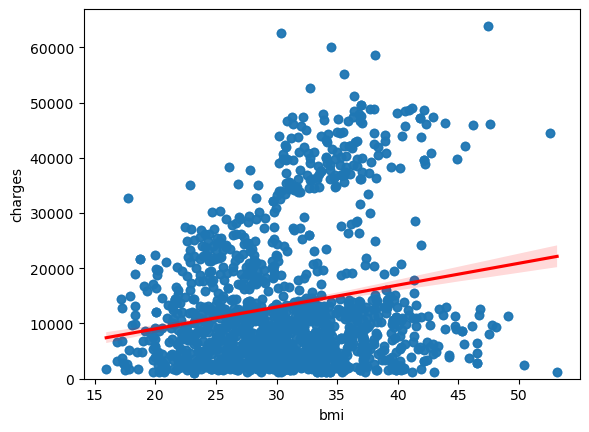

In [6]:
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

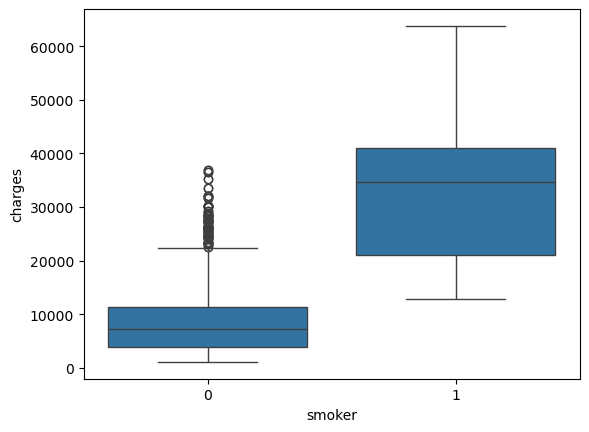

In [7]:
sns.boxplot(x="smoker", y="charges", data=df)

In [8]:
print(df.corr())

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.026046  0.113048  0.037574 -0.023286 -0.007167  0.298624
sex      -0.026046  1.000000  0.042924  0.016020  0.082326  0.022213  0.062837
bmi       0.113048  0.042924  1.000000 -0.001492  0.011489  0.271119  0.199846
children  0.037574  0.016020 -0.001492  1.000000  0.006362 -0.025717  0.066442
smoker   -0.023286  0.082326  0.011489  0.006362  1.000000  0.054077  0.788783
region   -0.007167  0.022213  0.271119 -0.025717  0.054077  1.000000  0.054058
charges   0.298624  0.062837  0.199846  0.066442  0.788783  0.054058  1.000000


In [9]:
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))

0.6221791733924185


In [10]:
# definition of Y and lm remain same as used in last cell. 
Z = df[["age", "sex", "bmi", "children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))

0.7504083820289634


In [11]:
# Y and Z use the same values as defined in previous cells 
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))

0.8452574046807049


In [12]:
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

In [13]:
 #x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6760807731582408


In [14]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7835631107608149
